## Main topic: Google Search Impact on Cryptocurrencies

1. Regression
2. KS Test, p value
3. Quarterly average -> Wald's test, p value


### Preprocessing

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
import scipy.stats as st
import utils
plt.style.use('fivethirtyeight')

In [2]:
btc_data = pd.read_csv('prices/bitcoin_dataset.csv')
btc_price = pd.read_csv('prices/bitcoin_price.csv')
trend_data = pd.read_csv('supporting datasets/googletrend.csv')

In [3]:
b = pd.read_csv('prices/bitcoin_price.csv')
b = b.drop(columns=['Volume', 'Open', 'Low', 'High', 'Market Cap'])

In [4]:
b['Date'] = pd.to_datetime(b['Date'])
b

,Date,Close
0,2018-02-20,11403.70
1,2018-02-19,11225.30
2,2018-02-18,10551.80
3,2018-02-17,11112.70
4,2018-02-16,10233.90
5,2018-02-15,10166.40
6,2018-02-14,9494.63
7,2018-02-13,8598.31
8,2018-02-12,8926.57
9,2018-02-11,8129.97


#### Convert date to datetime format

In [5]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_price['Date'] = pd.to_datetime(btc_price['Date'])
trend_data['Date'] = pd.to_datetime(trend_data['Date'])

In [6]:
# btc_merged = btc_data.merge(trend_data)
btc_merged = b.merge(trend_data)

In [10]:
btc_merged['btc_market_price'] = btc_merged['Close']

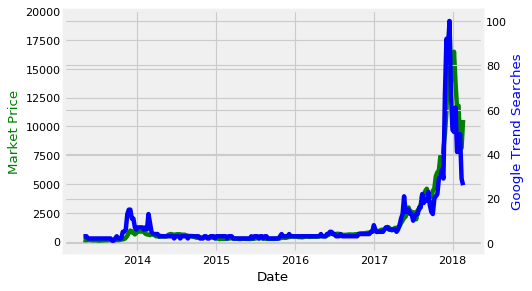

In [11]:
x = btc_merged['Date']
y1 = btc_merged['btc_market_price']
y2 = btc_merged['Searches']

fig, ax1 = plt.subplots(dpi=80)

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Market Price', color='g')
ax2.set_ylabel('Google Trend Searches', color='b')

plt.show()

### Finding correlation

In [12]:
correlation = btc_merged.corr().loc[['btc_market_price', 'Searches'], ['Searches', 'btc_market_price']]

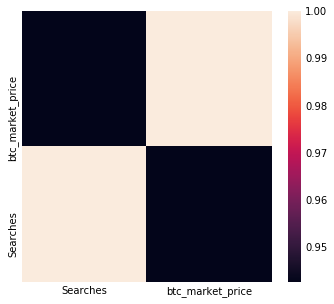

In [13]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation)

## [I] Predictions
### 1. Simple Linear Regression

In [14]:
model = LinearRegression()
searches = np.array(btc_merged['Searches']).reshape(-1,1)
btcmp = np.array(btc_merged['btc_market_price']).reshape(-1,1)
# Normalizing data
# searches = searches/max(searches)
btcmp = (1.0*btcmp/max(btcmp))*(100)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(searches, btcmp, test_size=0.33, random_state=42)

In [16]:
# model.fit(X_train, y_train)
# beta = model.coef_
beta = utils.MultipleLinearRegression(X_train, y_train)
print("beta:",beta)

('beta:', array([[0.98041022]]))


In [17]:
# model.score(X_test,y_test)
y_hat = X_test.dot(beta)

In [18]:
# y_hat = model.predict(X_test)

In [19]:
sse = utils.SSE(y_test, y_hat)
mape = utils.MAPE(y_test, y_hat)
rms = np.sqrt(mean_squared_error(y_test, y_hat))
print("sse:",sse)
print("mape:",mape)
print("rms:",rms)

('sse:', array([2051.36776954]))
('mape:', array([52.93530538]))
('rms:', 4.941765360226465)


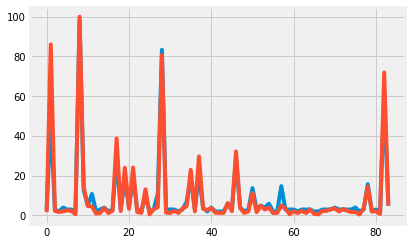

In [20]:
plt.plot(y_hat)
plt.plot(y_test)

## [II] Hypothesis Testing

### 1. KS Test

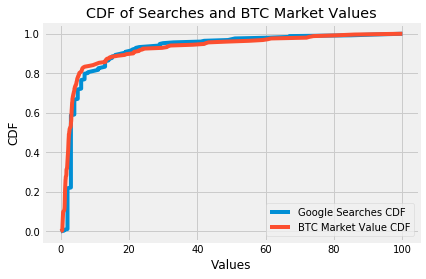

In [21]:
plt.title("CDF of Searches and BTC Market Values")
plt.xlabel("Values")
plt.ylabel("CDF")
tx, ty = utils.plot_a(searches.astype(float))
tx = np.insert(tx, 0,0)
ty = np.insert(ty, 0,0)
cdf1 = plt.plot(tx,ty, label="Google Searches CDF")
plt.legend([cdf1])

tx1, ty1 = utils.plot_a(btcmp.astype(float))
tx1 = np.insert(tx1, 0,0)
ty1 = np.insert(ty1, 0,0)
# print(tx1)
cdf2 = plt.plot(tx1,ty1, label="BTC Market Value CDF")
plt.legend()

#### Calculating $D(F_X, F_Y)$

In [22]:
stats.ks_2samp(tx,tx1)

Ks_2sampResult(statistic=0.3557312252964427, pvalue=1.1857946238626393e-14)

### Wald's Test

In [45]:
# Noramlizing
bt = btc_merged['Close']
close = (1.0*bt/max(bt))*(100)

In [47]:
btc_merged['Close'] = close
btc_merged

,Date,Close,Searches,btc_market_price,Year,Month
0,2018-02-18,55.127267,26,10551.80,2018,2
1,2018-02-11,42.474557,29,8129.97,2018,2
2,2018-02-04,43.242759,49,8277.01,2018,2
3,2018-01-28,61.576841,42,11786.30,2018,1
4,2018-01-21,60.604050,41,11600.10,2018,1
5,2018-01-14,71.951016,61,13772.00,2018,1
6,2018-01-07,86.086266,50,16477.60,2018,1
7,2017-12-31,73.959291,51,14156.40,2017,12
8,2017-12-24,72.754535,67,13925.80,2017,12
9,2017-12-17,100.000000,100,19140.80,2017,12


#### First proving asymptotically normal using monthly average

In [48]:
btc_merged.head()

,Date,Close,Searches,btc_market_price,Year,Month
0,2018-02-18,55.127267,26,10551.80,2018,2
1,2018-02-11,42.474557,29,8129.97,2018,2
2,2018-02-04,43.242759,49,8277.01,2018,2
3,2018-01-28,61.576841,42,11786.30,2018,1
4,2018-01-21,60.604050,41,11600.10,2018,1


In [49]:
btc_merged['Year'] = btc_merged['Date'].apply(lambda x: x.year)
btc_merged['Month'] = btc_merged['Date'].apply(lambda x: x.month)
btc_merged.head()

,Date,Close,Searches,btc_market_price,Year,Month
0,2018-02-18,55.127267,26,10551.80,2018,2
1,2018-02-11,42.474557,29,8129.97,2018,2
2,2018-02-04,43.242759,49,8277.01,2018,2
3,2018-01-28,61.576841,42,11786.30,2018,1
4,2018-01-21,60.604050,41,11600.10,2018,1


In [50]:
monthly_avg = btc_merged.groupby(['Year', 'Month']).mean()
(monthly_avg)
# mAvg_BTC = monthly_avg.reset_index()

Close   Searches  btc_market_price
Year Month                                        
2013 4       0.701172   3.000000          134.2100
     5       0.635266   2.500000          121.5950
     6       0.549622   2.000000          105.2020
     7       0.469899   2.000000           89.9425
     8       0.582199   2.000000          111.4375
     9       0.686314   1.800000          131.3660
     10      0.833534   2.750000          159.5450
     11      2.361487   9.750000          452.0075
     12      4.169178  10.000000          798.0140
2014 1       4.640598   7.000000          888.2475
     2       3.566622   8.000000          682.6800
     3       2.977305   5.200000          569.8800
     4       2.362911   3.250000          452.2800
     5       2.472650   3.000000          473.2850
     6       3.222749   2.800000          616.8600
     7       3.239232   2.750000          620.0150
     8       2.774785   2.800000          531.1160
     9       2.267630   3.000000          434.0425
     10      1.885122   2.500000          360.8275
     11      1.904466   2.400000          364.5300
     12      1.782593   2.750000          341.2025
2015 1       1.298156   3.000000          248.4775
     2       1.203163   2.750000          230.2950
     3       1.391384   2.600000          266.3220
     4       1.226150   2.000000          234.6950
     5       1.241954   2.000000          237.7200
     6       1.239982   2.500000          237.3425
     7       1.500825   2.750000          287.2700
     8       1.319830   2.600000          252.6260
     9       1.220325   2.000000          233.5800
     10      1.346117   2.250000          257.6575
     11      1.791775   3.200000          342.9600
     12      2.204767   3.250000          422.0100
2016 1       2.123255   3.000000          406.4080
     2       2.163115   3.000000          414.0375
     3       2.171121   3.000000          415.5700
     4       2.257508   3.000000          432.1050
     5       2.438299   3.400000          466.7100
     6       3.449320   4.500000          660.2275
     7       3.420380   3.400000          654.6880
     8       3.028060   3.000000          579.5950
     9       3.168689   3.000000          606.5125
     10      3.373109   3.400000          645.6400
     11      3.757171   4.000000          719.1525
     12      4.219142   4.500000          807.5775
2017 1       4.780887   5.800000          915.1000
     2       5.537373   5.750000         1059.8975
     3       5.867009   6.250000         1122.9925
     4       6.298671   6.200000         1205.6160
     5       9.929862  14.750000         1900.6550
     6      13.854724  13.750000         2651.9050
     7      13.000825  12.800000         2488.4620
     8      20.581350  18.750000         3939.4350
     9      20.860701  18.250000         3992.9050
     10     28.060144  21.000000         5370.9360
     11     40.129618  39.750000         7681.1300
     12     77.323414  79.000000        14800.3200
2018 1      70.054543  48.500000        13409.0000
     2      46.948194  34.666667         8986.2600

In [52]:
mAvg_BTC.head()

,Year,Month,Close,Searches,btc_market_price
0,2013,4,134.2100,3.0,134.2100
1,2013,5,121.5950,2.5,121.5950
2,2013,6,105.2020,2.0,105.2020
3,2013,7,89.9425,2.0,89.9425
4,2013,8,111.4375,2.0,111.4375


In [55]:
delta_0 = 0
close = btc_merged['Close']
searches = btc_merged['Searches']
delta = np.mean(close)-np.mean(searches)
numerator = delta-delta_0
denominator = np.sqrt(np.var(close)/len(close) + np.var(searches)/len(searches))

In [58]:
W = abs(1.0*numerator/denominator)

In [59]:
W

0.28124533994846895

#### p value

In [61]:
st.norm.cdf(W)

0.610738884392758